# 🧬 Biopartnering Insights Database Exploration

This notebook provides a comprehensive guide to exploring the biopartnering insights database, understanding the schema, and analyzing the collected data.

## 📊 Database Overview
- **Database Type**: SQLite
- **File**: `biopartnering_insights.db`
- **Purpose**: Store biopharmaceutical company, drug, clinical trial, and target data

## 🎯 What You'll Learn
1. Database schema and table relationships
2. Data exploration techniques
3. Sample queries and analysis
4. Visualization examples
5. Export options for other tools


## 🔧 Database Schema Reference

### Table Relationships:
```
companies (1) ←→ (many) drugs
companies (1) ←→ (many) clinical_trials
drugs (1) ←→ (many) clinical_trials
drugs (many) ←→ (many) targets (via drug_targets)
drugs (many) ←→ (many) indications (via drug_indications)
```

### Key Fields:
- **companies**: name, official_website, pipeline_url, news_url
- **drugs**: generic_name, brand_name, mechanism_of_action, drug_class
- **clinical_trials**: nct_id, title, phase, status, start_date, completion_date
- **targets**: name, description, target_type
- **documents**: url, title, content, source_type

### Export Files Created:
- `drugs_for_tableau.csv` - Comprehensive drug data
- `clinical_trials_for_tableau.csv` - Clinical trial data

---

**💡 Pro Tip**: Use the exported CSV files in Tableau, Power BI, or other BI tools for advanced visualizations and dashboards!


## 📦 Import Required Libraries


In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## 🔗 Connect to Database


In [4]:
# Connect to the SQLite database
conn = sqlite3.connect('../biopartnering_insights.db')

# Test connection
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("📊 Available Tables:")
for table in tables:
    print(f"  • {table[0]}")

print(f"\n✅ Connected to database with {len(tables)} tables")


📊 Available Tables:
  • companies
  • targets
  • indications
  • documents
  • rag_cache
  • drugs
  • clinical_trials
  • drug_targets
  • drug_indications

✅ Connected to database with 9 tables


## 🗂️ Database Schema Overview


In [5]:
def get_table_schema(table_name):
    """Get schema information for a table"""
    cursor.execute(f"PRAGMA table_info({table_name})")
    columns = cursor.fetchall()
    
    print(f"\n📋 Table: {table_name}")
    print("-" * 50)
    for col in columns:
        col_id, name, data_type, not_null, default, pk = col
        pk_marker = " (PRIMARY KEY)" if pk else ""
        null_marker = " NOT NULL" if not_null else ""
        print(f"  {name}: {data_type}{null_marker}{pk_marker}")

# Get schema for all tables
for table in tables:
    get_table_schema(table[0])



📋 Table: companies
--------------------------------------------------
  id: INTEGER NOT NULL (PRIMARY KEY)
  name: VARCHAR(255) NOT NULL
  ticker: VARCHAR(10)
  website: VARCHAR(500)
  description: TEXT
  created_at: DATETIME
  updated_at: DATETIME

📋 Table: targets
--------------------------------------------------
  id: INTEGER NOT NULL (PRIMARY KEY)
  name: VARCHAR(255) NOT NULL
  hgnc_symbol: VARCHAR(50)
  uniprot_id: VARCHAR(50)
  gene_id: VARCHAR(50)
  target_type: VARCHAR(100)
  description: TEXT
  created_at: DATETIME
  updated_at: DATETIME

📋 Table: indications
--------------------------------------------------
  id: INTEGER NOT NULL (PRIMARY KEY)
  name: VARCHAR(255) NOT NULL
  ncit_id: VARCHAR(50)
  icd10_code: VARCHAR(20)
  indication_type: VARCHAR(100)
  description: TEXT
  biomarker_status: JSON
  created_at: DATETIME
  updated_at: DATETIME

📋 Table: documents
--------------------------------------------------
  id: INTEGER NOT NULL (PRIMARY KEY)
  source_url: VARCHAR(10

## 📈 Data Overview and Statistics


In [6]:
# Get row counts for each table
print("📊 Table Row Counts:")
print("=" * 30)

for table in tables:
    table_name = table[0]
    cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
    count = cursor.fetchone()[0]
    print(f"{table_name:20} : {count:,} rows")

print("\n✅ Database statistics loaded")


📊 Table Row Counts:
companies            : 130 rows
targets              : 197 rows
indications          : 537 rows
documents            : 9,069 rows
rag_cache            : 25 rows
drugs                : 164 rows
clinical_trials      : 1,138 rows
drug_targets         : 430 rows
drug_indications     : 1,307 rows

✅ Database statistics loaded


## 🏢 Companies Data Exploration


In [7]:
# Load companies data
companies_df = pd.read_sql_query("SELECT * FROM companies", conn)

print("🏢 Companies Overview:")
print(f"Total Companies: {len(companies_df)}")
print(f"\nColumns: {list(companies_df.columns)}")

# Display first few companies
print("\n📋 Sample Companies:")
display(companies_df.head(10))


🏢 Companies Overview:
Total Companies: 130

Columns: ['id', 'name', 'ticker', 'website', 'description', 'created_at', 'updated_at']

📋 Sample Companies:


,id,name,ticker,website,description,created_at,updated_at
0,1,Roche/Genentech,None,https://api.fda.gov/drug/label.json?id=3d78c70...,,2025-09-23 03:56:09.818388,2025-09-23 03:56:09.818741
1,2,Pfizer Laboratories Div Pfizer Inc,None,https://api.fda.gov/drug/label.json?id=d159ec9...,,2025-09-23 03:56:10.462171,2025-09-23 03:56:10.462287
2,3,Amgen,None,https://api.fda.gov/drug/label.json?id=0921bf2...,,2025-09-23 03:56:10.495775,2025-09-23 03:56:10.495929
3,4,Daiichi Sankyo,None,https://api.fda.gov/drug/label.json?id=bfb3962...,,2025-09-23 03:56:10.554828,2025-09-23 03:56:10.554964
4,5,Cephalon,None,https://api.fda.gov/drug/label.json?id=3e8f0d3...,,2025-09-23 03:56:10.632395,2025-09-23 03:56:10.632609
5,6,Accord BioPharma,None,https://api.fda.gov/drug/label.json?id=30da642...,,2025-09-23 03:56:10.663840,2025-09-23 03:56:10.663992
6,7,Organon,None,https://api.fda.gov/drug/label.json?id=a1dc858...,,2025-09-23 03:56:10.695878,2025-09-23 03:56:10.696034
7,8,Biocon Biologics,None,https://api.fda.gov/drug/label.json?id=ef07d38...,,2025-09-23 03:56:10.763790,2025-09-23 03:56:10.763977
8,9,AbbVie Inc.,None,https://api.fda.gov/drug/label.json?id=8fa21e2...,,2025-09-23 03:56:10.908817,2025-09-23 03:56:10.908987
9,10,"CELLTRION USA, Inc.",None,https://api.fda.gov/drug/label.json?id=46db780...,,2025-09-23 03:56:11.120466,2025-09-23 03:56:11.120605


## 💊 Drugs Data Exploration


In [8]:
# Load drugs data with company information
drugs_query = """
SELECT d.*, c.name as company_name
FROM drugs d
JOIN companies c ON d.company_id = c.id
ORDER BY c.name, d.generic_name
"""

drugs_df = pd.read_sql_query(drugs_query, conn)

print("💊 Drugs Overview:")
print(f"Total Drugs: {len(drugs_df)}")
print(f"Unique Companies: {drugs_df['company_name'].nunique()}")
print(f"\nColumns: {list(drugs_df.columns)}")

# Display first few drugs
print("\n📋 Sample Drugs:")
display(drugs_df[['generic_name', 'brand_name', 'company_name', 'mechanism_of_action']].head(10))


💊 Drugs Overview:
Total Drugs: 164
Unique Companies: 36

Columns: ['id', 'generic_name', 'brand_name', 'drug_class', 'mechanism_of_action', 'fda_approval_status', 'fda_approval_date', 'company_id', 'rxnorm_id', 'drugbank_id', 'unii', 'nct_codes', 'created_at', 'updated_at', 'company_name']

📋 Sample Drugs:


,generic_name,brand_name,company_name,mechanism_of_action
0,Venetoclax,Venclexta,AbbVie Inc.,None
1,Blinatumomab,BLINCYTO,Amgen,None
2,Panitumumab,Vectibix,Amgen,None
3,Sotorasib,LUMAKRAS,Amgen,None
4,Tarlatamab,IMDELLTRA,Amgen,None
5,Bevacizumab,ALYMSYS,Amneal Pharmaceuticals LLC,Therapeutic Protein
6,Fezolinetant,VEOZAH,"Astellas Pharma US, Inc.",None
7,Gilteritinib,Xospata,"Astellas Pharma US, Inc.",Kinase Inhibitor
8,Zolbetuximab,VYLOY,"Astellas Pharma US, Inc.",None
9,Durvalumab,IMFINZI,AstraZeneca Pharmaceuticals LP,Monoclonal Antibody


🏆 Top 15 Companies by Drug Count:
Roche/Genentech           : 110 drugs
Teva Pharmaceuticals, Inc. :   4 drugs
AstraZeneca Pharmaceuticals LP :   4 drugs
Amgen                     :   4 drugs
Fresenius Kabi USA, LLC   :   4 drugs
Astellas Pharma US, Inc.  :   3 drugs
Gland Pharma Limited      :   3 drugs
Merck & Co.               :   2 drugs
Bristol Myers Squibb      :   2 drugs
Mylan Pharmaceuticals Inc. :   2 drugs
AbbVie Inc.               :   1 drugs
Onyx Pharmaceuticals, Inc. :   1 drugs
Mylan Institutional LLC   :   1 drugs
SEAGEN INC.               :   1 drugs
Regeneron Pharmaceuticals, Inc. :   1 drugs


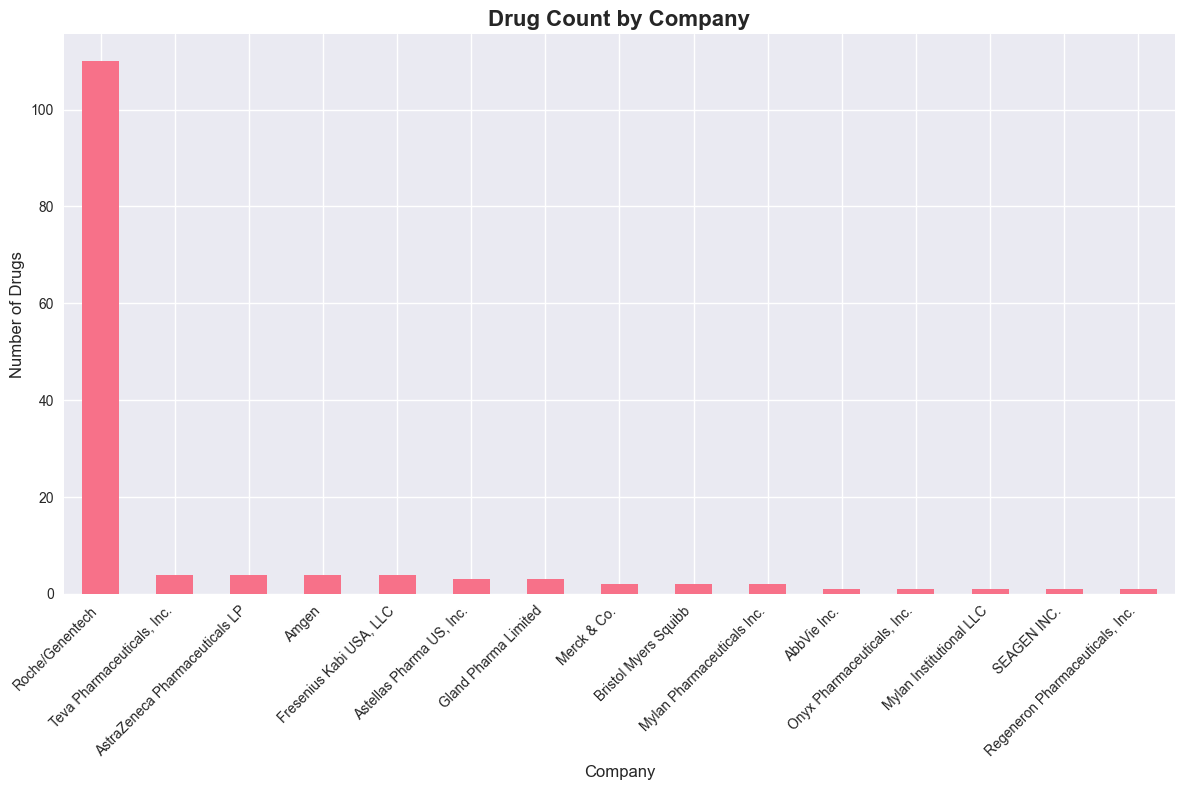

In [9]:
# Drug counts by company
drug_counts = drugs_df['company_name'].value_counts().head(15)

print("🏆 Top 15 Companies by Drug Count:")
for company, count in drug_counts.items():
    print(f"{company:25} : {count:3} drugs")

# Visualization
plt.figure(figsize=(12, 8))
drug_counts.plot(kind='bar')
plt.title('Drug Count by Company', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of Drugs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 🧪 Clinical Trials Data Exploration


In [10]:
# Load clinical trials data
trials_df = pd.read_sql_query("SELECT * FROM clinical_trials", conn)

print("🧪 Clinical Trials Overview:")
print(f"Total Clinical Trials: {len(trials_df)}")
print(f"\nColumns: {list(trials_df.columns)}")

# Display first few trials
print("\n📋 Sample Clinical Trials:")
display(trials_df[['nct_id', 'title', 'phase', 'status']].head(10))


🧪 Clinical Trials Overview:
Total Clinical Trials: 1138

Columns: ['id', 'nct_id', 'title', 'phase', 'status', 'start_date', 'completion_date', 'sponsor_id', 'drug_id', 'trial_type', 'primary_purpose', 'study_population', 'primary_endpoints', 'secondary_endpoints', 'created_at', 'updated_at']

📋 Sample Clinical Trials:


,nct_id,title,phase,status
0,NCT02003222,FDA Comprehensive Approval: BLINCYTO,Unknown,Completed
1,NCT03164616,FDA Comprehensive Approval: IMFINZI,Unknown,Completed
2,NCT02091999,FDA Comprehensive Approval: PADCEV EJFV,Unknown,Unknown
3,NCT03070990,FDA Comprehensive Approval: PADCEV EJFV,Unknown,Unknown
4,NCT04995419,FDA Comprehensive Approval: PADCEV EJFV,Unknown,Unknown
5,NCT04380753,FDA Comprehensive Approval: LUMAKRAS,Unknown,Active
6,NCT04303780,FDA Comprehensive Approval: LUMAKRAS,Unknown,Active
7,NCT04185883,FDA Comprehensive Approval: LUMAKRAS,Unknown,Active
8,NCT03600883,FDA Comprehensive Approval: LUMAKRAS,Unknown,Active
9,NCT05198934,FDA Comprehensive Approval: LUMAKRAS,Unknown,Active


## 📤 Export Data for Other Tools


In [12]:
# Export comprehensive drug data for Tableau
drugs_export_query = """
SELECT 
    d.generic_name,
    d.brand_name,
    d.mechanism_of_action,
    d.drug_class,
    c.name as company_name,
    c.website as company_website,
    c.ticker as company_ticker,
    COUNT(DISTINCT ct.id) as clinical_trial_count,
    COUNT(DISTINCT dt.target_id) as target_count
FROM drugs d
JOIN companies c ON d.company_id = c.id
LEFT JOIN clinical_trials ct ON d.id = ct.drug_id
LEFT JOIN drug_targets dt ON d.id = dt.drug_id
GROUP BY d.id, d.generic_name, d.brand_name, d.mechanism_of_action, d.drug_class, c.name, c.website, c.ticker
ORDER BY c.name, d.generic_name
"""

drugs_export = pd.read_sql_query(drugs_export_query, conn)

print("📤 Exporting comprehensive drug data...")
drugs_export.to_csv('../outputs/drugs_for_tableau.csv', index=False)
print(f"✅ Exported {len(drugs_export)} drug records to drugs_for_tableau.csv")

# Display sample
display(drugs_export.head(10))


📤 Exporting comprehensive drug data...
✅ Exported 164 drug records to drugs_for_tableau.csv


,generic_name,brand_name,mechanism_of_action,drug_class,company_name,company_website,company_ticker,clinical_trial_count,target_count
0,Venetoclax,Venclexta,None,Vaccine,AbbVie Inc.,https://api.fda.gov/drug/label.json?id=8fa21e2...,None,27,7
1,Blinatumomab,BLINCYTO,None,Vaccine,Amgen,https://api.fda.gov/drug/label.json?id=0921bf2...,None,16,2
2,Panitumumab,Vectibix,None,Chemotherapy,Amgen,https://api.fda.gov/drug/label.json?id=0921bf2...,None,16,6
3,Sotorasib,LUMAKRAS,None,Chemotherapy,Amgen,https://api.fda.gov/drug/label.json?id=0921bf2...,None,15,4
4,Tarlatamab,IMDELLTRA,None,Chemotherapy,Amgen,https://api.fda.gov/drug/label.json?id=0921bf2...,None,0,5
5,Bevacizumab,ALYMSYS,Therapeutic Protein,Therapeutic Protein,Amneal Pharmaceuticals LLC,https://api.fda.gov/drug/label.json?id=0017a82...,None,39,1
6,Fezolinetant,VEOZAH,None,None,"Astellas Pharma US, Inc.",https://api.fda.gov/drug/label.json?id=b1aef23...,None,18,3
7,Gilteritinib,Xospata,Kinase Inhibitor,Kinase Inhibitor,"Astellas Pharma US, Inc.",https://api.fda.gov/drug/label.json?id=b1aef23...,None,13,5
8,Zolbetuximab,VYLOY,None,Chemotherapy,"Astellas Pharma US, Inc.",https://api.fda.gov/drug/label.json?id=b1aef23...,None,12,7
9,Durvalumab,IMFINZI,Monoclonal Antibody,Monoclonal Antibody,AstraZeneca Pharmaceuticals LP,https://api.fda.gov/drug/label.json?id=46c42e7...,None,25,1


## ⚠️ Schema Note

**Important**: The database schema uses different column names than what might be expected:

- **companies table**: Uses `website` (not `official_website`) and `ticker` (not `pipeline_url`)
- **Actual columns**: `id`, `name`, `ticker`, `website`, `description`, `created_at`, `updated_at`

This is why the export query above uses `c.website` and `c.ticker` instead of the originally planned column names.
